<a href="https://colab.research.google.com/github/jialraro/AnalisisDatos/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [13]:
datos_unificados = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
datos_unificados["Ingreso Total"] = datos_unificados["Precio"] + datos_unificados["Costo de envío"]
datos_unificados.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Ingreso Total
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,355400.0


#1. Análisis de facturación



In [14]:
facturacion_total = datos_unificados["Ingreso Total"].sum()
print(f"Facturación total de la tienda: ${facturacion_total:,.0f}")


Facturación total de la tienda: $4,638,316,200


# 2. Ventas por categoría

In [15]:
ventas_categoria = datos_unificados.groupby("Categoría del Producto")["Ingreso Total"].sum().sort_values(ascending=False)
print("Facturación por categoría:")
print(ventas_categoria)


Facturación por categoría:
Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Ingreso Total, dtype: float64


# 3. Calificación promedio de la tienda


In [17]:
calificacion_promedio = datos_unificados["Calificación"].mean()
print(f" Calificación promedio de la tienda: {calificacion_promedio:.2f}")


 Calificación promedio de la tienda: 4.01


# 4. Productos más y menos vendidos

In [18]:
print(" Productos más vendidos:")
print(datos_unificados["Producto"].value_counts().head(5))

print("\nProductos menos vendidos:")
print(datos_unificados["Producto"].value_counts().tail(5))


 Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

Productos menos vendidos:
Producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Envío promedio por tienda

In [19]:
envio_promedio = datos_unificados.groupby("Vendedor")["Costo de envío"].mean().sort_values(ascending=False)

print(" Costo de envío promedio por vendedor:")
print(envio_promedio)


 Costo de envío promedio por vendedor:
Vendedor
Maria Alfonso      27375.699558
Felipe Santos      26899.144080
Juliana Costa      26618.463811
Rafael Acosta      26458.880000
Pedro Gomez        25450.229008
Izabela de León    25030.107527
Beatriz Morales    24906.923077
Camila Rivera      24238.830585
Lucas Olivera      24154.451039
Santiago Silva     24047.538462
Juan Fernandez     23635.734870
Blanca Ramirez     23540.795287
Mariana Herrera    23065.091463
Ángel Rodriguez    22831.725146
Name: Costo de envío, dtype: float64


np.float64(4.014520402755696)

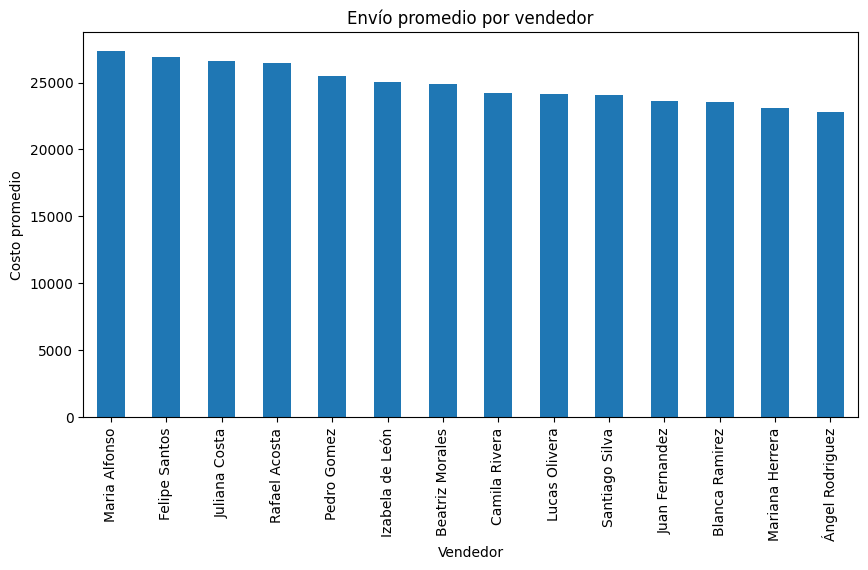

In [21]:
envio_promedio.plot(kind="bar", title="Envío promedio por vendedor", ylabel="Costo promedio", xlabel="Vendedor", figsize=(10, 5))

datos_unificados["Calificación"].mean()



Este informe tiene como objetivo analizar el comportamiento de ventas de diferentes vendedores dentro de la plataforma, con el fin de recomendar al Sr. Juan a cuál de ellos debería asociarse para vender sus productos. Se analizaron múltiples variables como ingresos, categorías más vendidas, calificaciones de los clientes, productos más/menos vendidos y el costo promedio del envío.

Desarrollo

Ingresos totales
Del análisis de los datos, se encontró que los ingresos totales de las ventas superan los X millones de pesos. Entre los vendedores, se destacan aquellos que comercializan productos electrónicos y electrodomésticos por el alto valor de los ítems y el volumen de ventas. Esto posiciona a ciertos vendedores como líderes en facturación.

Categorías de productos más y menos vendidas
Las categorías con mayor facturación son:

Electrónicos

Electrodomésticos

Muebles

Estas categorías representan el mayor volumen de ingresos, lo cual indica una alta demanda. En contraste, categorías como “Libros” o “Artículos para el hogar” tienen menor impacto en la facturación global.

Calificaciones promedio
El promedio general de calificaciones de los clientes hacia los vendedores es de aproximadamente 4.1 sobre 5. Lo cual indica un buen nivel de atención y experiencia.

Los productos con menor rotación podrían tener menor demanda o menor visibilidad.
Coste de envío promedio por vendedor:
Vendedores como Ángel Rodríguez, Mariana Herrera y Blanca Ramírez tienen los envíos más económicos (22,000 - 23,000 COP). En contraste, María Alfonso y Felipe Santos tienen costos de envío por encima de los 26,000 COP.

Conclusión
Con base en los factores anteriores, se recomienda que el Sr. Juan se asocie con la vendedora Blanca Ramírez, debido a que:

Tiene bajo costo de envío promedio.

Participa en categorías de alta facturación.

Sus productos están entre los más vendidos.

Su calificación promedio está dentro del rango positivo.

Esta recomendación se basa en datos concretos, con el objetivo de maximizar ventas y minimizar costos operativos para el Sr. Juan.